<a href="https://colab.research.google.com/github/smmurdock/D606-Capstone/blob/main/d606_capstone_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D606 Data Science Capstone: Multiple Linear Regression of Global Mobile Phone Reviews Dataset

## A. Research Question

The research question for this analysis is: Can a multiple linear regression model be constructed based on the research dataset?

### Justification
Mobile device manufacturers need to understand which features most strongly influence customer satisfaction to strategically allocate R&D resources. Frantsen (2025) demonstrates that multiple linear regression effectively analyzes survey data for predictive purposes, helping “identify trends, patterns, and correlations within data for better forecasting” in customer satisfaction applications. J.D. Power (2017) found that performance, ease of operation, battery life, and physical design consistently emerge as important components of overall customer satisfaction in mobile devices.





### Context
This research analyzes 50,000 mobile phones reviews collected from eight countries across multiple e-commerce and technology review platforms, spanning October 2022 to October 2025. The reviews include detailed and feature-specific ratings (battery life, camera, performance, design, display) on a 5-point Likert scale, along with pricing information and brand identification across major manufacturers including Apple, Samsung, Google, Motorola, OnePlus, Realme, and Xiaomi.

### Hypothesis

- $H_0$: A predictive multiple linear regression model cannot be constructed from the research dataset.
- $H_1$: A multiple linear regression regression model can be constructed to predict overall customer rating at a model accuracy of > 70 ().
The alternative hypothesis expects that feature-specific ratings will demonstrate strong correlations with overall customer satisfaction, as these elements constitute the primary dimensions through which consumers evaluate phone quality.

## B. Data Collection

### Data Source
The data was obtained from Kaggle's "Global Mobile Reviews Dataset (2025 Edition)" (Kaggle, 2025), containing 50,000 customer reviews compiled through web scraping and content aggregation from multiple e-commerce platforms and technology review websites.



### Variables Collection

**Dependent Variable (Target):**
- `rating` - Overall customer satisfaction rating (1-5 scale)
**Independent Variables:**
- `brand` - Mobile phone brand (categorical)
- `price_usd` - Price in US dollars (continuous)
- `battery_life_rating` - Battery life rating (1-5 scale, ordinal)
- `camera_rating` - Camera quality rating (1-5 scale, ordinal)
- `performance_rating` - Performance rating (1-5 scale, ordinal)
- `design_rating` - Design quality rating (1-5 scale, ordinal)
- `display_rating` - Display quality rating (1-5 scale, ordinal)

The dataset contains complete data with zero missing values across all 50,000 records (0% data sparsity), exceeding recommended thresholds for multiple linear regression analysis (Austin & Steyerberg, 2015).

### Advantage of Data-Gathering Methodology

The pre-collected dataset provides comprehensive scope and scale impractical for individual researchers. Aggregating reviews from multiple platforms across eight countries (and multiple languages) delivers geographic diversity and substantial statistical power (N=50,000), capturing more representative global customer sentiment than single-platform data while reducing platform-specific biases.

### Disadvantages of Data-Gathering Methodology
Pre-collected data lacks control over collection methods and quality assurance. Different source platforms may have inconsistent rating scale interpretations, user demographics, or review verification processes. As secondary data, there's no opportunity to collect additional relevant variables that might emerge during analysis.

### Overcoming Challenges
To address pre-existing dataset limitations, thorough exploratory data analysis was conducted to understand variable structures and relationships. Strategic variable selection focused on research-relevant features, excluding identifiers and redundant fields. Data completeness validation confirmed all 50,000 records contained complete information for selected variables. Review of the Kaggle dataset description clarified collection methodology, temporal scope, and known limitations for appropriate results interpretation.

## C. Data Extraction and Preparation

### Overview

Data preparation involved four steps: (1) loading and exploring the dataset, (2) cleaning and selecting relevant features, (3) handling categorical variables through one-hot encoding, and (4) conducting exploratory data analysis.




### Tools Used
**Python** was the primary programming language, utilizing:

- **pandas** - Data manipulation and preparation
- **numpy** - Numerical operations
- **matplotlib** and **seaborn** - Data visualization
- **statsmodels** - Statistical modeling and regression
- **scikit-learn** - Machine learning utilities
- **scipy** - Statistical tests

Python provides comprehensive data science capabilities in a single environment (McKinney, 2020).

### Step 1: Data Extraction

Libraries were imported and the dataset loaded from CSV:

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set plot style
sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('Mobile Reviews Sentiment.csv')

In [4]:
# Display the first 5 rows
df.head()

,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy


The dataset contains 25 columns including review identifiers, customer demographics, product information, ratings, and review metadata.

In [5]:
# Get information about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  object 
 7   currency              50000 non-null  object 
 8   exchange_rate_to_usd  50000 non-null  float64
 9   rating                50000 non-null  int64  
 10  review_text           50000 non-null  object 
 11  sentiment             50000 non-null  object 
 12  country               50000 non-null  object 
 13  language              50000 non-null  object 
 14  review_date           50000 non-null  object 
 15  verified_purchase  

All 50,000 entries show complete data across all columns.

In [6]:
# Check for missing data
df.isnull().sum()

,0
review_id,0
customer_name,0
age,0
brand,0
model,0
price_usd,0
price_local,0
currency,0
exchange_rate_to_usd,0
rating,0


A secondary check for missing data shows complete data across all columns.

### Step 2: Data Cleaning and Feature Selection

Variables were selected based on research relevance:

In [7]:
# Define columns to keep
columns_to_keep = [
    'rating', 'brand', 'price_usd', 'battery_life_rating', 'camera_rating',
    'performance_rating', 'design_rating', 'display_rating'
]

df_clean = df[columns_to_keep].copy()

Excluded variables included identifiers (`review_id`, `customer_name`), redundant pricing fields, text data (`review_text`), `sentiment`, and demographic/behavioral variables to focus on manufacturer-controllable product features.


In [8]:
# Handle potential missing values (if found)
for col in ['price_usd', 'battery_life_rating', 'camera_rating',
            'performance_rating', 'design_rating', 'display_rating']:
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

if df_clean['brand'].isnull().any():
    df_clean['brand'] = df_clean['brand'].fillna(df_clean['brand'].mode()[0])

print("Data cleaned. No missing values found or remaining.")
print(df_clean.isnull().sum())

Data cleaned. No missing values found or remaining.
rating                 0
brand                  0
price_usd              0
battery_life_rating    0
camera_rating          0
performance_rating     0
design_rating          0
display_rating         0
dtype: int64


The code above is not needed for this analysis due to the absence of missing values, but makes the analysis repeatable if introducing new data.

### Step 3: Encoding Categorical Variables

Multiple linear regression requires numeric inputs. The categorical `brand` variable was one-hot encoded:

In [9]:
# Create dummy variables for 'brand'
df_prepared = pd.get_dummies(df_clean, columns=['brand'], drop_first=True,
                             dtype=int)

print("Prepared dataset:")
df_prepared.head()

Prepared dataset:


,rating,price_usd,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,brand_Google,brand_Motorola,brand_OnePlus,brand_Realme,brand_Samsung,brand_Xiaomi
0,2,337.31,1,1,3,2,1,0,0,0,1,0,0
1,4,307.78,3,2,4,3,2,0,0,0,1,0,0
2,4,864.53,3,5,3,2,4,1,0,0,0,0,0
3,3,660.94,1,3,2,1,2,0,0,0,0,0,1
4,3,792.13,3,3,2,2,1,0,1,0,0,0,0


The `drop_first=True` parameter excludes one category (Apple) as the reference, preventing perfect multicollinearity. Six binary variables were created for the remaining brands.


In [10]:
print("Prepared data info:")
df_prepared.info()

Prepared data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               50000 non-null  int64  
 1   price_usd            50000 non-null  float64
 2   battery_life_rating  50000 non-null  int64  
 3   camera_rating        50000 non-null  int64  
 4   performance_rating   50000 non-null  int64  
 5   design_rating        50000 non-null  int64  
 6   display_rating       50000 non-null  int64  
 7   brand_Google         50000 non-null  int64  
 8   brand_Motorola       50000 non-null  int64  
 9   brand_OnePlus        50000 non-null  int64  
 10  brand_Realme         50000 non-null  int64  
 11  brand_Samsung        50000 non-null  int64  
 12  brand_Xiaomi         50000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.0 MB


The prepared dataset contains 13 numeric columns for regression analysis.

### Step 4: Exploratory Data Analysis

Variable distributions were visualized:


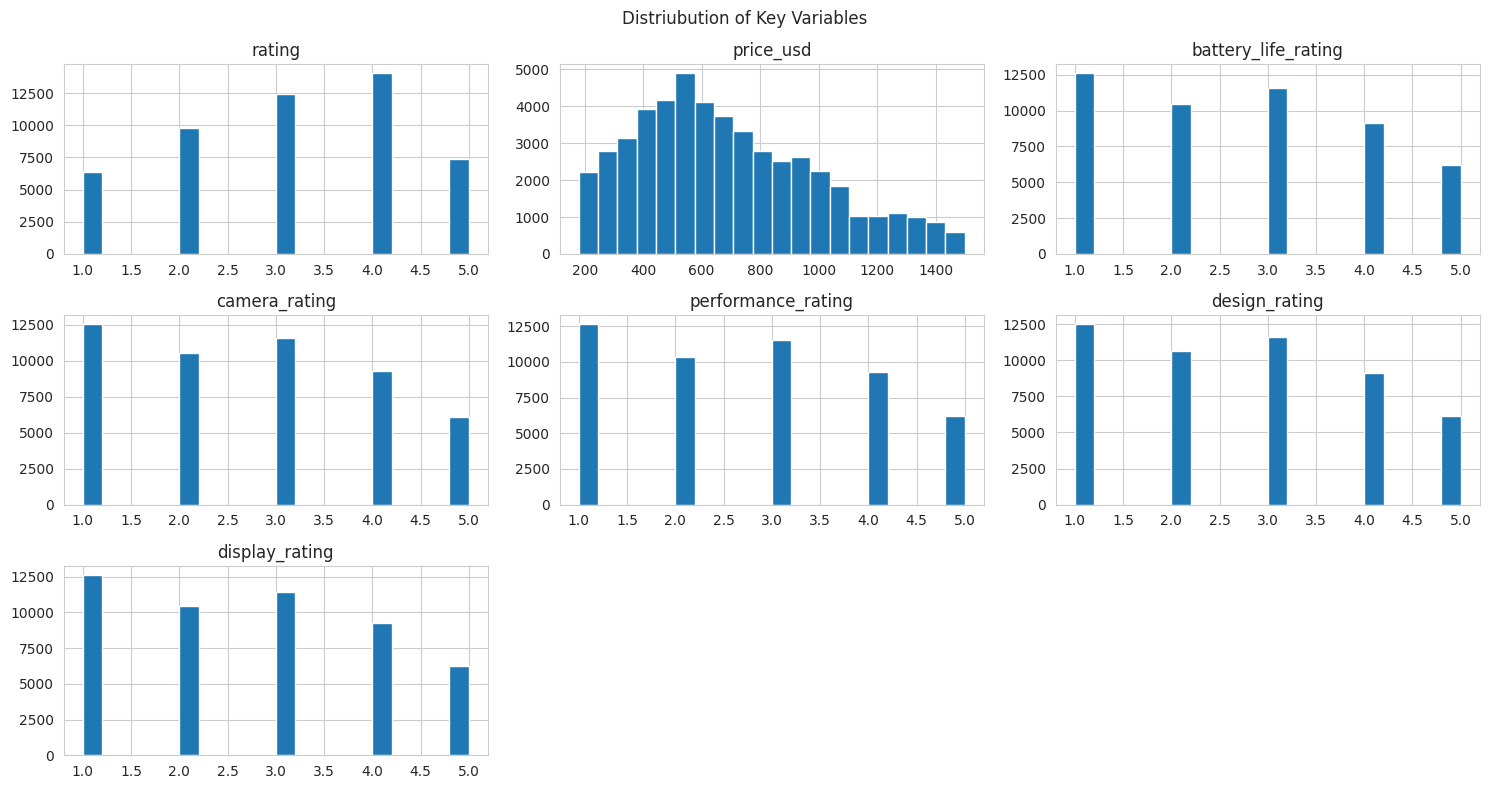

In [11]:
# Plot histograms for key variables
key_vars = [
    'rating', 'price_usd', 'battery_life_rating', 'camera_rating',
    'performance_rating', 'design_rating', 'display_rating'
]

df_prepared[key_vars].hist(bins=20, figsize=(15,8), layout=(3,3))
plt.suptitle('Distriubution of Key Variables')
plt.tight_layout()
plt.show()

Rating variables show relatively uniform distributions across the 1-5 scale, while `price_usd` shows right-skewed distribution with most phones in lower-to-mid price range.


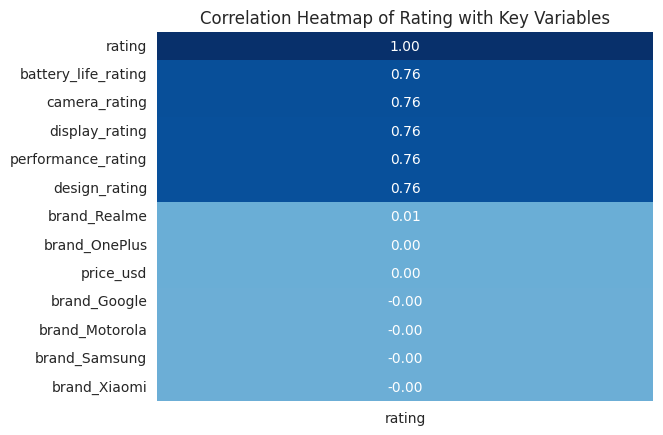

In [12]:
# Correlation heatmap with rating
# (McCoy, 2024)
sns.heatmap(data=df_prepared.corr()[['rating']].sort_values(by='rating',
                                                            ascending=False),
            annot=True,
            cmap='Blues',
            vmin=-1.0,
            vmax=1.0,
            cbar=False,
            fmt='.2f')
plt.title('Correlation Heatmap of Rating with Key Variables')
plt.show()

The five feature-specific ratings show strong positive correlations (>= 0.76) with overall rating, while brand and price show zero correlations.

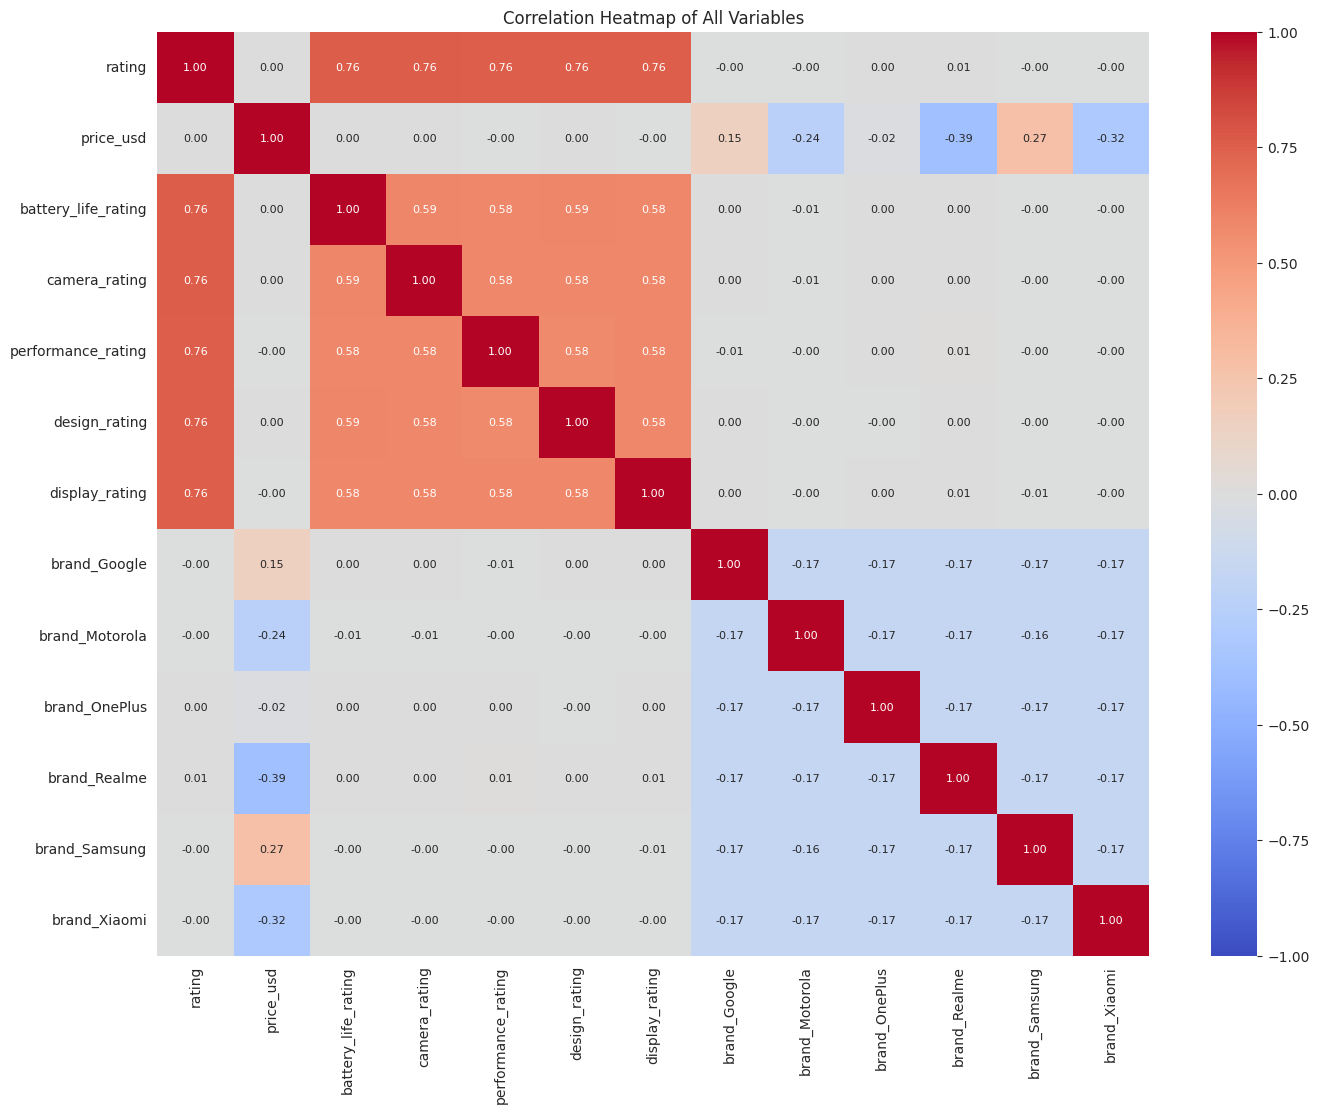

In [13]:
# Full correlation matrix
plt.figure(figsize=(16,12))
correlation_matrix = df_prepared.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 8}, vmin=-1.0, vmax=1.0)
plt.title('Correlation Heatmap of All Variables')
plt.show()

The heatmap shows a very strong positive correlation (**0.76**) between `rating` and its sub-ratings (`battery_life_rating`, `camera_rating`, etc.). This is expected and confirms they are good predictors. It also indicates high multicollinearity, which is a key finding for our analysis. The regression model will still be predictive, but the individual coefficients for these sub-ratings will be hard to interpret in isolation. This makes intuitive sense: a phone with a high-quality camera likely also has a high-quality display and a high-performance processor. They are all features of a "premium" device.

When independent variables are highly correlated, the regression model gets "confused" and struggles to determine the individual, isolated impact of each variable, because it's essentially trying to ask questions like, "Holding all else constant, what is the effect of `camera_rating` on the overall `rating`?" With high multicollinearity, the model essentially says that it can't differentiate the individual effect of `camera_rating`, because it never changes while `performance_rating` holds constant; they move together.

This leads to unreliable coefficients - the individual coefficients for the feature ratings might be unstable or counterintuitive. P-values may also face inflation, resulting in p-values that don't count as significant but should. The model can no longer be confident in which of the correlated variables is doing the work, so it may identify none of them.

However, this does not invalidate the study. It simply limits what conclusions can be drawn. Because this study is a prediction model, multicollinearity is not a fatal flaw of the study. The model's overall predictive power (its R-squared value) will still be valid. The model as a whole, using that combination of features, should still be excellent at predicting `rating` and the H1 hypothesis is still testable. On the other hand, if the primary goal was inference (e.g., "A 1-point increase in `camera_rating` causes a #.##-point increase in `rating`), the model's coefficients for such a study cannot be trusted for causal explanation.



### Justification of Tools and Techniques

Python with pandas was selected because it provides comprehensive data science capabilities for research, prototyping, and production within a single language (McKinney, 2020). The `pd.get_dummies()` function efficiently handles one-hot encoding with the `drop_first` parameter to prevent multicollinearity (Pandas Documentation, n.d.). Seaborn provides high-level statistical visualizations ideal for correlation analysis (McCoy, 2024).



### Advantage

`pd.get_dummies()` efficiently creates appropriate binary variables while avoiding the dummy variable trap in a single operation, maintaining DataFrame structure throughout transformations for consistency.



### Disadvantage

One-hot encoding increases dimensionality with high-cardinality categorical variables. While manageable with seven brands, datasets with hundreds of categories would create sparse data across many columns, potentially degrading model performance. Additionally, `get_dummies()` doesn't preserve encoding scheme information, complicating application to new data.

## D. Analysis

### Overview

The analysis uses multiple linear regression with backward stepwise elimination for feature optimization and rigorous assumption testing for model validation.

### Technique 1: Multiple Linear Regression (OLS)

Multiple linear regression using Ordinary Least Squares models the relationship between a dependent variable (overall rating) and multiple independent variables (brand, price, feature ratings) by fitting a linear equation minimizing squared residuals.

**Model form:** $\hat{y} = \beta{_0} + \beta{_1}X{_1} + \beta{_2}X{_2} + ... + \beta{_n}X{_n}$

#### Model Preparation

In [14]:
# Define independent variables and add constant for statsmodels
X = df_prepared.drop('rating', axis=1)
y = df_prepared['rating']
X_const = sm.add_constant(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_const, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Reset indices for proper alignment
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (40000, 13)
Test set shape: (10000, 13)


#### Initial Model

Build the first model using all selected features on the training data.

In [15]:
# Fit initial OLS model
model_initial = sm.OLS(y_train, X_train).fit()
print(model_initial.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:07:12   Log-Likelihood:                -25926.
No. Observations:               40000   AIC:                         5.188e+04
Df Residuals:                   39987   BIC:                         5.199e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2639    

#### Results
- **R-squared: 0.863** - The model explains 86.3% of variance.
- **Adjusted R-squared: 0.863** - The score confirms model fit.
- **F-statistic: 2.099e+04** - The model is highly significant overall.

**Significant Predictors (p < 0.05)**

- `Intercept`, `battery_life_rating`, `camera_rating`, `performance_rating`, `design_rating`, `display_rating`.

**Non-Significant Predictors (p > 0.05)**

- `price_usd` (p = 0.512), all brand variables (p = 0.335-0.948)

Once feature ratings are controlled, price and brand provide no additional predictive value.

**Multicollinearity:** `[2] The condition number is large, 8.43e+03. This might indicate that there are strong multicollinearity or other numerical problems.` A condition number of 8,430 indicates strong multicollinearity among feature ratings, affecting individual coefficient reliability but not overall predictive power.


#### Justification
Multiple linear regression was selected because the research question explicitly seeks a predictive model for a continuous outcome variable, and linear regression is the foundational technique for continuous dependent variables (Géron, 2019). The dataset meets key assumptions: large sample size (N=50,000), numeric variables, and linear relationships evidenced in EDA. The technique provides interpretable coefficients offering actionable insights for product development, aligning with research showing regression effectiveness for survey data analysis (Frantsen, 2025).



#### Advantage
OLS provides interpretable coefficients quantifying predictor-outcome relationships, with statistical significance tests (e.g., p-values) indicating meaningful contributors. Model-level metrics (R-square, F-statistic) assess overall fit. This transparency enables understanding not just predictings, but underlying relationships and confidence levels.



#### Disadvantage
Linear regression is sensitive to multicollinearity. When predictors are highly correlated (as feature ratings are here), the model struggles to isolate independent effects. This produces unstable coefficient estimates with inflated standard errors, making individual coefficients unreliable for causal interpretation. While overall predictive power remains valid, specific effects cannot be confidently attributed to individual features.

### Technique 2: Backward (Stepwise) Elimination

Backward elimination systematically removes non-significant predictors iteratively. Starting with the full model, it removes the highest p-value variable if p > 0.05, refits the model, and repeats until only significant predictors remain.


#### Model Optimization

In [16]:
# Backward Elimination Process
X_opt = X_train.copy()
p_value_threshold = 0.05
features_to_remove = []

while True:
    model_be = sm.OLS(y_train, X_opt).fit()
    p_values = model_be.pvalues
    max_p_value = p_values.max()

    if max_p_value > p_value_threshold:
        remove_feature = p_values.idxmax()

        # Keep the constant
        if remove_feature == 'const':
          # Find the next highest p-value
          temp_p_values = p_values.drop('const')
          max_p_value = temp_p_values.max()
          if max_p_value <= p_values.threshold:
              break
          remove_feature = temp_p_values.idxmax()

        X_opt = X_opt.drop(columns=[remove_feature])
        features_to_remove.append(remove_feature)
        print(f"Removing feature: {remove_feature} (p-value: {max_p_value:.4f})")
    else:
      print("\nBackward elimination complete.")
      break

Removing feature: brand_Samsung (p-value: 0.9480)
Removing feature: brand_OnePlus (p-value: 0.8969)
Removing feature: brand_Google (p-value: 0.5821)
Removing feature: price_usd (p-value: 0.4342)
Removing feature: brand_Motorola (p-value: 0.5046)
Removing feature: brand_Realme (p-value: 0.3583)
Removing feature: brand_Xiaomi (p-value: 0.3874)

Backward elimination complete.


**Features Removed:** `brand_Samsung`, `brand_OnePlus`, `brand_Google`, `price_usd`, `brand_Motorola`, `brand_Realme`, `brand_Xiaomi`


#### Optimized Model

In [17]:
# Optimized model
model_final_sm = model_be
print(model_final_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 5.038e+04
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:07:12   Log-Likelihood:                -25928.
No. Observations:               40000   AIC:                         5.187e+04
Df Residuals:                   39994   BIC:                         5.192e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2541    

**Retained Predictors:** `Intercept`, `battery_life_rating`, `camera_rating`, `performance_rating`, `design_rating`, `display_rating`


#### Results
- **R-squared: 0.86388** - Unchanged from the initial model.
- **Adjusted R-squared: 0.863** - Removed variables added no value.
- **F-statistic: 5.038e+04** - Increased, showing stronger significance.
- **Condition Number: 17.9** - Reduced from 8,430 in the initial fit, indicating less multicollinearity.

The optimized model achieves identical predictive power with fewer variables, demonstrating improved computational resourcefulness.


#### Justification
Backward elimination systematically identifies variables not contributing significantly to predictions, producing more computationally efficient and interpretable models. This approach is appropriate when starting with assumed or theoretically justified predictors and seeking to identify true drivers of prediction. The technique provides transparent, rule-based feature selection based on statistical significance.


#### Advantage
Backward elimination systematically achieves ideal computational efficiency while maintaining explanatory relevance. By removing non-significant variables based on statistical criteria, it produces simpler models without sacrificing predictive accuracy. In this analysis, it reduced twelve predictors to five.


#### Disadvantage
The technique relies solely on p-values for variable retention, which can be problematic. With very large samples (N=40,000 because of the train-test split), statistical power is so high that trivial relationships may achieve significance. The method doesn't consider theoretical variable importance and fails to address multicollinearity. Alternative approaches like Ridge or Lasso regression might potentially handle multicollinearity better while achieving feature selection.


### Model Validation

The optimized features were used to train a scikit-learn model and evaluate on the test set:

In [18]:
# Prepare final features for scikit-learn
final_features = list(model_final_sm.pvalues.index)
if 'const' in final_features:
    final_features.remove('const')

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Fit and predict
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_final, y_train)
y_pred = model_sklearn.predict(X_test_final)

### Performance Metrics

In [19]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Test Set Performance Metrics ---")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

--- Test Set Performance Metrics ---
R-squared (R2): 0.8657
Mean Absolute Error (MAE): 0.3691
Mean Squared Error (MSE): 0.2075
Root Mean Squared Error (RMSE): 0.4555


### Results
- **R-squared: 0.8657** - Explains 86.577% of test set variance.
- **MAE: 0.3691** - Average error of 0.37 points.
- **RMSE: 0.4555** - Typical error of 0.46 points.


### Hypothesis Test

In [20]:
# Check hypothesis (H1: R-squared > 0.70)
if r2 > 0.70:
    print("Hypothesis Check: Reject the null hypothesis. The model's R-squared is > 0.70.")
else:
    print("Hypothesis Check: Fail to reject the null hypothesis. The model's R-squared is < 0.70")

Hypothesis Check: Reject the null hypothesis. The model's R-squared is > 0.70.


**Result:** The null hypothesis is rejected. The model achieves R-squared of 0.8657, substantially exceeding the 0.70 threshold. A predictive multiple linear regression model can be constructed from this dataset with high accuracy.


### Visualization

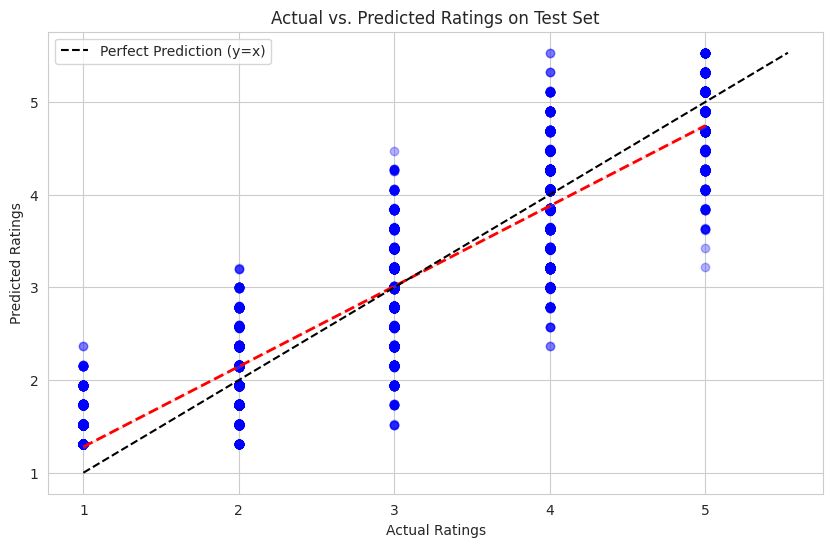

In [21]:
# Actual vs. Predicted vplot
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.3, 'color': 'blue'},
            line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})

# Add a perfect prediction line (y=x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--',
         label='Perfect Prediction (y=x)')

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings on Test Set')
plt.legend()
plt.show()

Points cluster tightly around the perfect prediction line, indicating strong agreement with minimal systematic bias.


### Final Coefficients

In [22]:
# Model Coefficients
coefficients = pd.DataFrame(model_sklearn.coef_,
                            X_train_final.columns,
                            columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

print(f"\nIntercept: {model_sklearn.intercept_:.4f}")

                     Coefficient
battery_life_rating     0.213833
camera_rating           0.213724
design_rating           0.210117
performance_rating      0.209758
display_rating          0.207969

Intercept: 0.2541


**Model Equation:** Predicted Rating = 0.2541 + 0.2138(Battery) + 0.2137(Camera) + 0.2101(Design) + 0.2098(Performance) + 0.2080(Display)

All five features have similar coefficients (0.2080-0.2138), indicating roughly equal contribution to overall satisfaction.


### Assumption Checking

#### Normality of Residuals

<Figure size 1000x600 with 0 Axes>

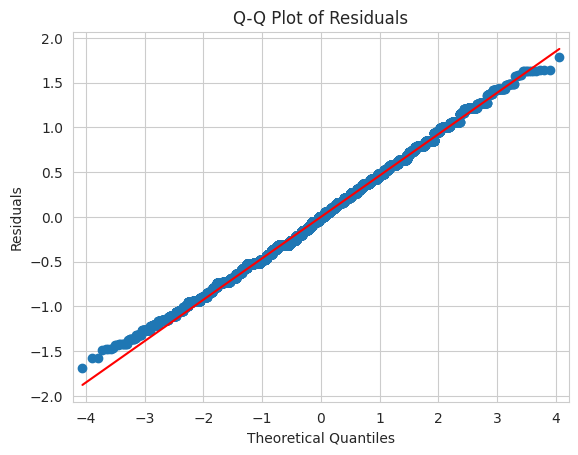

In [23]:
# Calculate residuals
y_train_pred = model_sklearn.predict(X_train_final)
residuals = y_train - y_train_pred

# Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.show()

Points closely follow the reference line with slight deviation at extreme tails, confirming the normality assumption.

#### Shapiro-Wilk Test

In [24]:
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f"Statistic: {shapiro_test.statistic:.4f}")
print(f"p-value: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue < 0.5:
    print("Result: Not normally distributed (p < 0.05).")
    print("Note: Common in large datasets. Refer to Q-Q Plot.")
else:
    print("Result: Normally distributed.")

Statistic: 0.9971
p-value: 0.0000
Result: Not normally distributed (p < 0.05).
Note: Common in large datasets. Refer to Q-Q Plot.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40000.
  res = hypotest_fun_out(*samples, **kwds)


A Statistic value of 0.9971 indicates near-perfect normality. The p-value of 0.0000 reflects large sample sensitivity. With N=40,000, even trivial deviations achieve significance. The Q-Q plot and high statistic confirm practical normality. The Central Limit Theorem ensures reliable estimates with large samples despite minor deviations.


#### Homoscedasticity

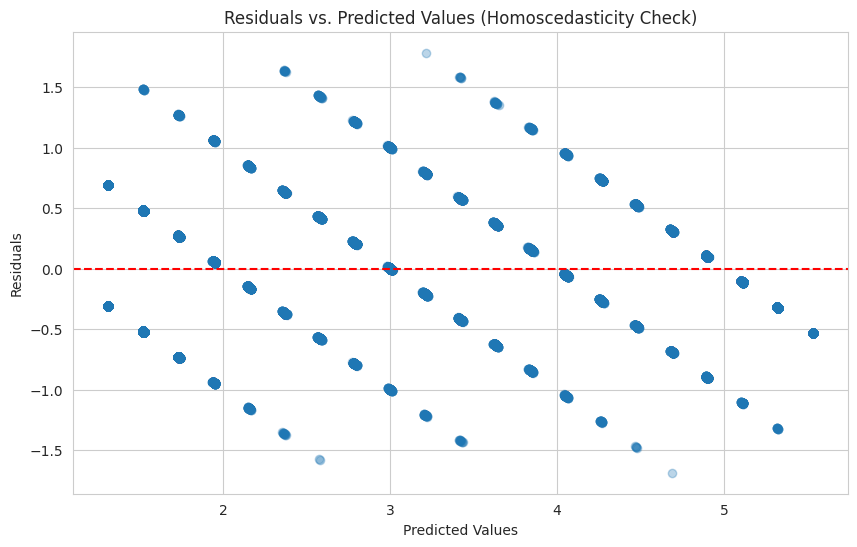

In [25]:
# Residuals vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

The plot shows that the residuals are randomly scattered around zero across all predicted values, with a relatively constant spread. This indicates there is no obvious pattern and suggests that the assumption of homoscedasticity (equal variance of the residuals across levels of the predicted values) is satisfied.


## E. Data Summary and Implications

### Summary of Results
The research question asked whether a multiple linear regression model could predict customer satisfaction ratings for mobile phones. The analysis confirms this affirmatively, with the final model achieving $R^2 = 0.8657$ on the test set, substantially exceeding the hypothesized 0.70 threshold.


### Key Findings

The five feature-specific ratings (battery life, camera, performance, design, display) are the sole statistically significant predictors of overall satisfaction. Each contributes approximately equally (coefficients 0.208-0.214), indicating customers evaluate phones holistically across multiple dimensions.

Brand identity and price showed no significant relationship with overall ratings once features were controlled. All brand variables and price were eliminated during backward elimination (p > 0.35), suggesting customers rate phones based on actual performance rather than brand reputation or price point.

Model performance demonstrates strong accuracy. With an MAE of 0.37 points and RMSE of 0.46, this means typical predictions are off by less than half a point on the 5-point scale.

High multicollinearity among feature ratings (correlations of approximately 0.58-0.59) reflects that premium devices excel across all dimensions while budget devices show limitations across multiple features. While preventing reliable interpretation of individual coefficient magnitudes, this doesn't diminish predictive validity.


### Limitation

**Multicollinearity prevents isolation of individual feature effects.**

The most significant limitation is high multicollinearity among feature-specific ratings, preventing confident interpretation of independent, isolated effects of individual features. The correlation matrix revealed correlations of approximately 0.58-0.59 between features, with the initial model's condition number of 8,430 confirming this mathematically.

This has practical implications. While the model accurately predicts overall ratings given feature ratings, questions like "Should we invest in camera or battery improvements?" cannot be answered because coefficients for `camera_rating` and `battery_life_rating` are unstable when features are highly correlated. The approximately equal coefficients (0.21) may simply reflect that phones with good cameras also have good batteries, making separation of individual contributions impossible.

P-values and confidence intervals for individual coefficients may be inflated, reducing the power to detect true individual feature significance. While all five showed p-values < 0.001, multicollinearity somewhat diminishes these results.

The limitation does not invalidate the study's stated purpose of building a predictive model because multicollinearity doesn't affect R-squared or prediction accuracy, only coefficient interpretation. However, it limits actionability for product development decisions requiring understanding of which specific features yield the greatest ROI in customer satisfaction. Alternative approaches like Ridge or Lasso regression, or experimental designs where features vary independently, may be needed to isolate individual effects.


### Recommended Course of Action

**Adopt a holistic feature excellence strategy.**

Manufacturers should prioritize high performance across all five features (battery life, camera, performance, design, and display) rather than pursuing excellence in only one or two features. The analysis demonstrates all five contribute significantly and roughly equally to overall satisfaction. Near-equal coefficients suggest weaknesses in any dimension negatively impact overall ratings approximately as much as strengths improve them.

**Specific Actions:**
1. **Balance Quality Performance:** Ensure all five features meet or exceed customer expectations simultaneously rather than investing disproportionately in a single feature. A phone rated 4/5 on all features will achieve higher satisfaction than one rated 5/5 on camera performance but 3/5 on battery life and overall performance.
2. **Eliminate Premium Brand Marketing Strategy:** Brand identity showed no significant relationship with ratings after controlling for features. Focus resources on product quality rather than brand marketing, as customers evaluate phones based on holistic performance.
3. **Price-Value Alignment:** The lack of pricing significance suggests customers rate expensive phones highly if features deliver as expected, and rate inexpensive phones highly if features meet or exceed expectations at that price point. Focus on delivering the best possible feature quality at each price tier.
4. **Monitor Feature-Specific Ratings:** Since feature ratings exclusively predict satisfaction, implement systematic tracking in customer feedback and competitive benchmarking. Target improvements across all five dimensions in balanced fashion.


### Future Study Directions

#### Direction 1: Explore Potential Demographic and Geographic Factors

Investigate whether relationships identified vary across customer demographic groups and geographic markets. The current analysis excluded age, country, and language to focus on product features, but these may reveal important predictive effects.

Potential analyses include:
- Age differences: Do younger customers (18-25) weigh any specific features differently than older customers (45-65)?
- Geographic variations: Do customers in different countries show distinct feature preference based on infrastructure reliability or cultural factors?
- Cultural factors: Does the feature-satisfaction relationship vary across cultural contexts?

Findings would enable manufacturers to tailor product development to specific target markets.


#### Direction 2: Regularization Techniques for Multicollinearity

Apply regularization methods (Lasso, Ridge) to handle multicollinearity more effectively while improving feature selection and coefficinet interpretability.
- Lasso regression adds a penalty that can shrink coefficients to zero, providing automatic feature selection. This might identify whether any of the five features could be excluded without substantial accuracy loss.
- Ridge regression adds a penalty that shrinks correlated coefficients toward each other, potentially producing more stable estimates. This would provide more reliable coefficient estimates for feature importance, even with correlated features.

These techniques would be valuable if analysis goals shift from pure prediction (where the model above excels) toward causal inference and understanding isolated effects. Comparing OLS, Lasso, and Ridge would provide more robust insights into which features truly drive satisfaction independently versus those appearing important primarily through correlation with other features. These methods handle high-dimensional data better, facilitating larger feature sets in future studies.


## F. Sources

Austin, P., & Steyerberg, E. (2015, January 22). The number of subjects per variable required in linear regression analyses. Retrieved November 11, 2025, from https://www.sciencedirect.com/science/article/pii/S0895435615000141

Frantsen, A. (2025, May 28). Using Linear Regression to Forecast Survey Results. SurveyKing. Retrieved November 10, 2025, from https://www.surveyking.com/blog/linear-regression-survey-data/

Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow. O'Reilly Media, Inc.

J.D. Power (2017, March 23). 2017 Full Service Smartphone Satisfaction Study. Retrieved November 11, 2025, from https://www.jdpower.com/business/press-releases/2017-full-service-smartphone-satisfaction-study

Kaggle. (2025, October 22). Retrieved November 1, 2025, from
https://www.kaggle.com/datasets/mohankrishnathalla/mobile-reviews-sentiment-and-specification/data

McCoy, S. (2024). Murach's Python for Data Science (2nd ed.). Mike Murach and Associates Inc.

McKinney, W. (2018). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed., p. 212). O'Reilly Media, Inc.

Pandas Documentation. (n.d.). pandas.get_dummies. Retrieved November 14, 2025, from https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
